In [1]:
from Parameterize import *
import cairosvg
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions, IPythonConsole
from IPython.display import SVG
from rdkit import rdBase
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw, AllChem, PandasTools, DataStructs

In [2]:
def draw_multiple_mol(smiles_list, names, mols_per_row=4, file_path=None):
    mols = []
    for i in smiles_list:
        mols.append(Chem.MolFromSmiles(i))
    mols_per_row = min(len(smiles_list), mols_per_row)
    img=Draw.MolsToGridImage(mols, molsPerRow=mols_per_row, subImgSize=(300, 180), useSVG=True, legends=names)
    if file_path:
        with open(file_path, 'w') as f_handle:
            f_handle.write(img.data)
    return img

In [3]:
## HEADGROUPS ##
Piperazine        = 'C1CN(C)CCN1CCCCC' #Ring with two amines 
amine             = 'CCCCCN(CCCCO)CCCCC' #Alcohol_link_amine
amine2            = 'CCCCCN(CCO)CCCCC' #Alcohol_link_amine 
KC                = 'CN(CC1OC(CCCC)(CCCCC)OC1)C' #KC1 - Ketal no linker 
DAP_amine         = 'CN(CC(COC(CCCC)=O)OC(CCCC)=O)C'  #Amine_two_esters
MC3_amine         = 'CCCCC(CCCC)OC(=O)CCCN(C)C' #Amine_one_ester
Amine_link_ester  = 'CN(C)CCCCCCOC(=O)CCCC' #Amine_link_ester 
Amine_link_ether  = 'CN(C)CCCCCCOCCCCC' #Amine_link_ether 
ether_ring        = 'CN(CCC1OC(CCCC)(CCCCC)OC1)C'#KC2 -ketal with linker 
ether_broken_map2 = 'CCOCC(CN(C)C)OCC' #Amine_two_ethers  
Amine_branched    = 'C(N(CCCCC)CCCCC)' #Teritiary amine with two branching tails 
triple_amine      = 'CN(C)CCCCN(C)CCCCN(C)(C)' #maybe add as well

#These needs to be done
Amine_carbamate   = 'CN(CC(CNC(CCCCC)=O)NC(CCCCC)=O)C'
Amine_ester_disulfied = 'CN(C)CCCCCCC(=O)OCCSSCCCCCCCC'
Amine_4_ring      = 'C1(=C(C(=O)C1=O)N(C))NCCC(N(CCCCC)CCCCC)'


HEADS = [amine, amine2, KC, ether_ring, ether_broken_map2, DAP_amine, MC3_amine, Amine_link_ester, Amine_link_ether, Amine_branched, \
         Piperazine, triple_amine, Amine_carbamate, Amine_ester_disulfied, Amine_4_ring]
HEAD_names = ['Amine-link-alchol', 'Amine2-link-alcohol', 'KC1_amine', 'KC2_amine', 'Amine_ethers', 'DAP_amine', 'MC3_amine', 'Amine_link_ester',\
              'Amine_link_ether', 'Amine_branched', 'Piperazine', 'Triple_amine', 'Amine_carbamate', 'Amine_ester_disulfied', 'Amine_4_ring']


#PEGylated lipid fragments
ALC             = 'COCCOCC(N(CCCC)CCCC)=O' #Pzifer PEGylated lipid Neutral and charged form
DMG             = 'O=C(CCCC)OCC(OC(CCCC)=O)COCCOC'   #Moderna PEGylated lipid

PEGs = [ALC, DMG]
PEG_names = ['ALC','DMG']

## LINKERS ##
Ester_branched3           = 'CCCCC(CCCC)OC(=O)CCCCC' 
Ester_branched_long_unsat = 'CCC=CCCCCCC(CCCCCC=CCC)OC(=O)CCCCC' 
Ester_branched_long_sat   = 'CCCCCCCCCC(CCCCCCCCC)OC(=O)CCCCC' 
Ether_link_sat            = 'COCCCCCCCCCCC' 
Ether_link_unsat          = 'COCCCCCCCCC=CC'
SC1_ester_SC1             = 'CCCCOC(=O)CCC'
C1_ester_C1               = 'CCCCCOC(=O)CCCC'
C4h_ester_C4h             = 'CCC=CCOC(=O)C=CCC'
Double_ester_long         = 'CCCCCC(=O)OCCOC(=O)CCCCC'
Double_ester_branched     = 'CCCCC(=O)OCCOC(=O)C(C)C'


LINKERS = [  SC1_ester_SC1, C1_ester_C1, C4h_ester_C4h,  Ester_branched_long_unsat, Ester_branched_long_sat, Ester_branched3, \
           Double_ester_long, Double_ester_branched,\
          Ether_link_sat, Ether_link_unsat]
LINKER_names =[ 'SC1_ester_SC1', 'C1_ester_C1', 'C4h_ester_C4h',  'Ester_branched_long_unsat', 'Ester_branched_long_sat', 'Ester_branched3', \
           'Double_ester_long', 'Double_ester_branched',\
          'Ether_link_sat', 'Ether_link_unsat']

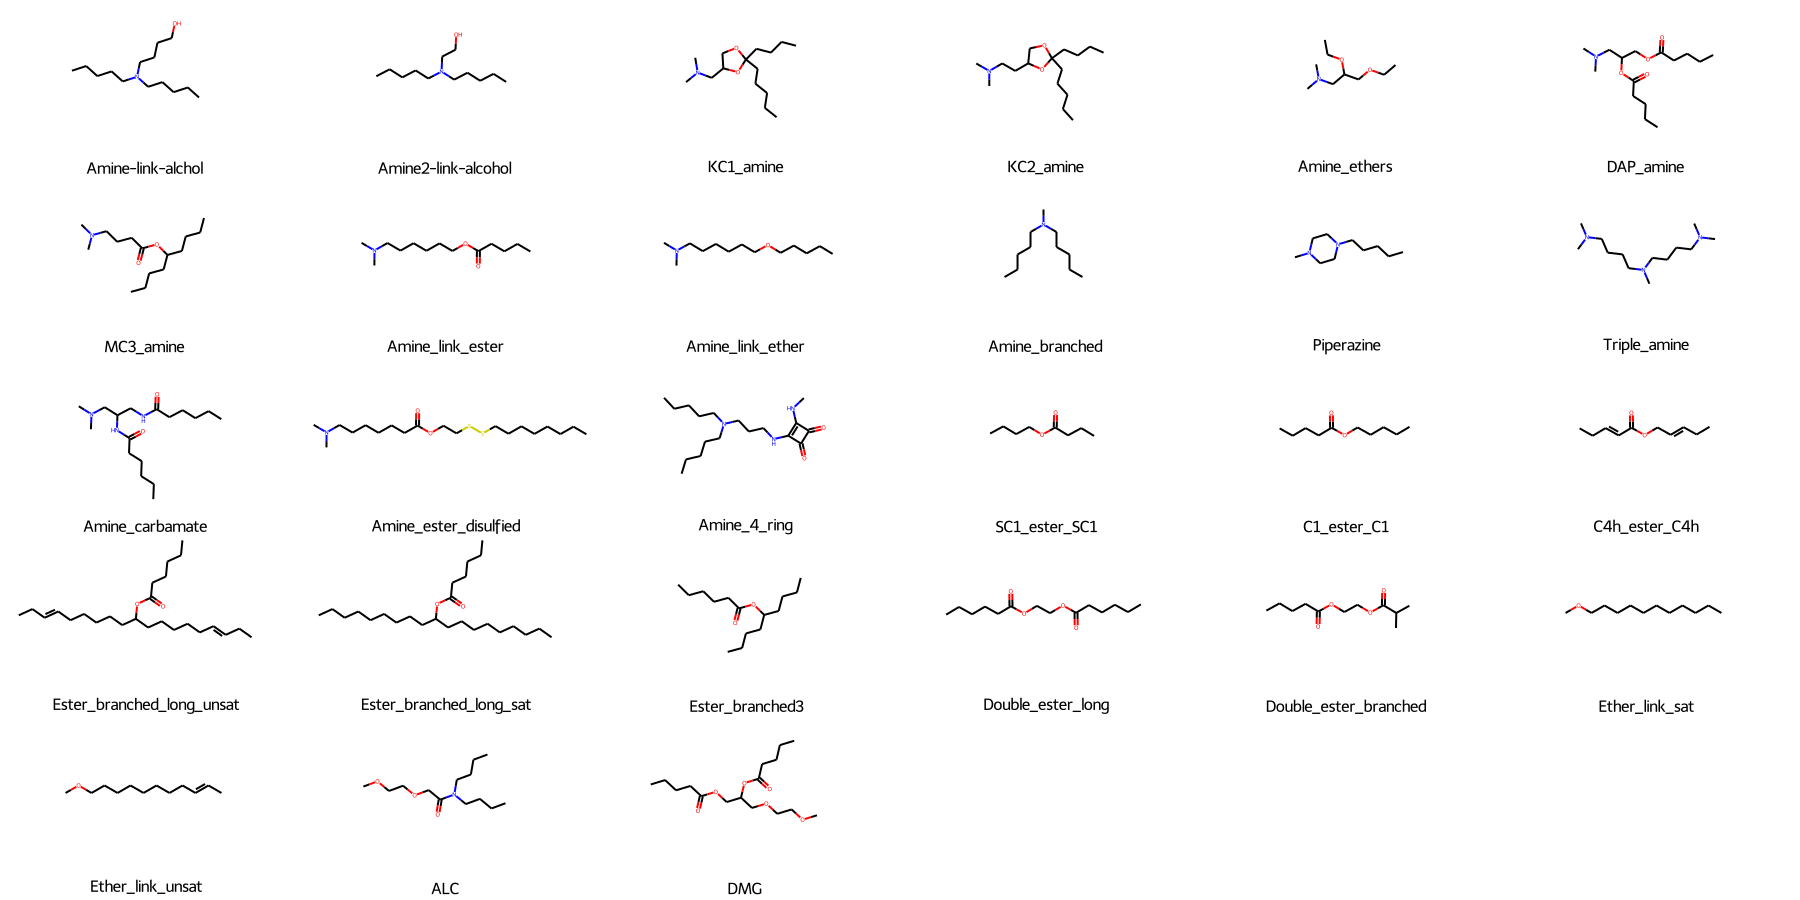

In [9]:
smiles = HEADS + LINKERS + PEGs
names = HEAD_names + LINKER_names + PEG_names

draw_multiple_mol(smiles, names, mols_per_row=6, file_path='all_FRAGMENTS.svg')

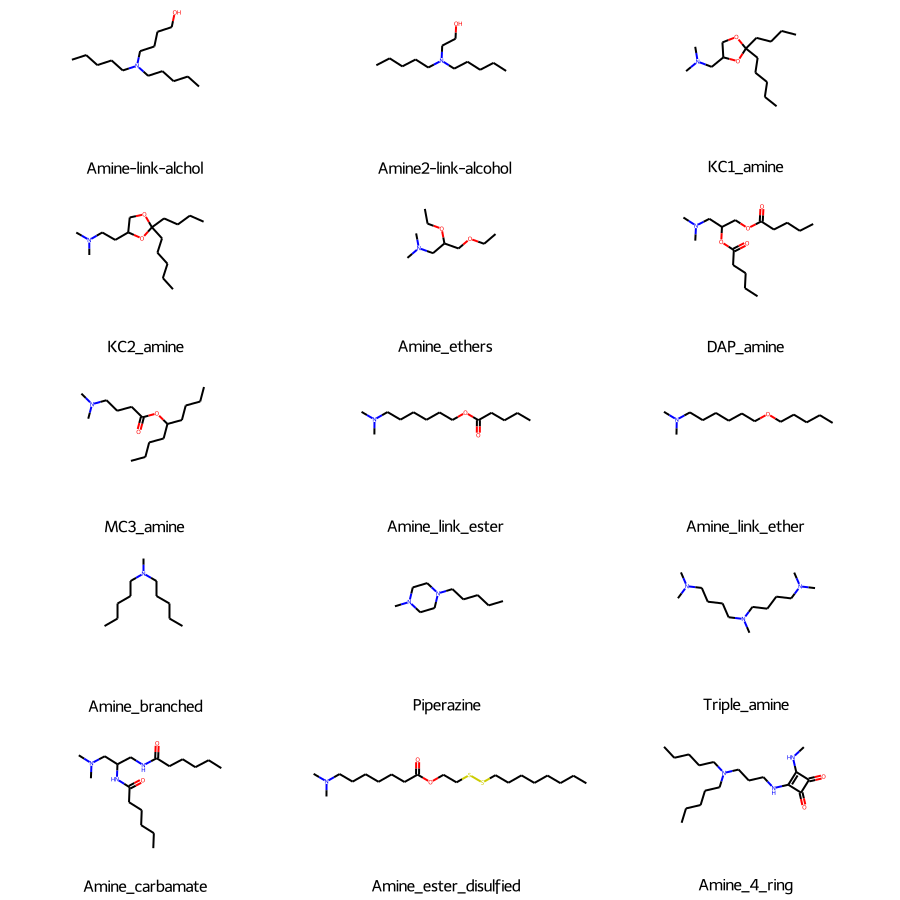

In [5]:
smiles = HEADS 
draw_multiple_mol(smiles, HEAD_names, mols_per_row=3, file_path='all_HEADS.svg')

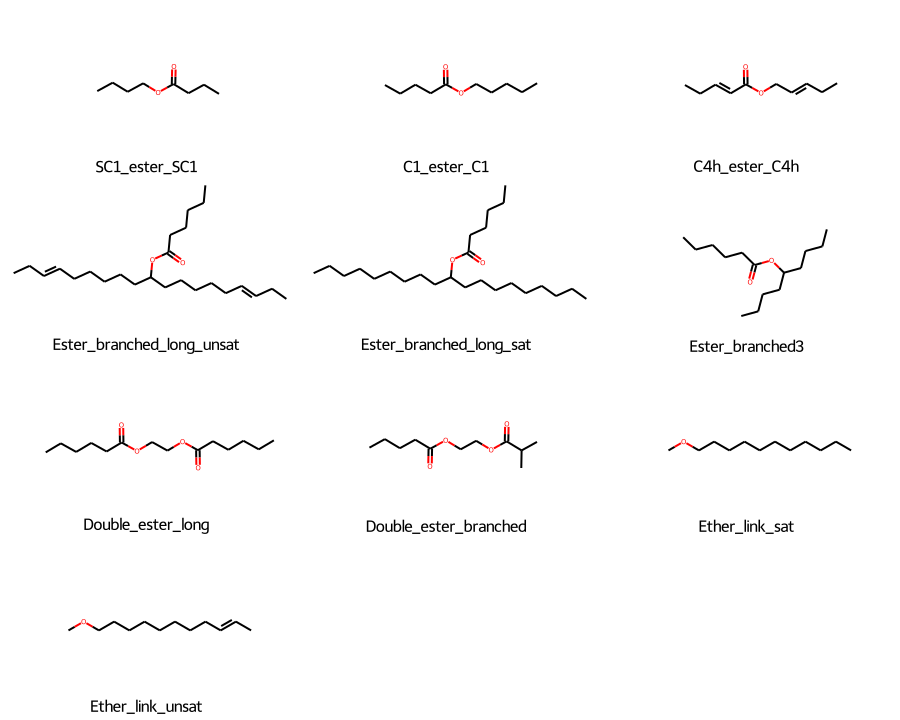

In [6]:
smiles = LINKERS
draw_multiple_mol(smiles, LINKER_names,  mols_per_row=3, file_path='all_LINKERS.svg')

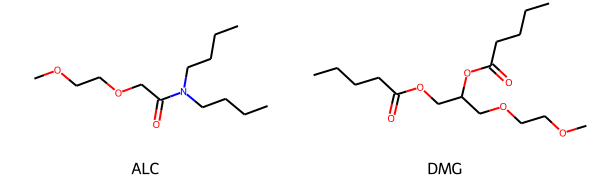

In [7]:
smiles = PEGs 
draw_multiple_mol(smiles, PEG_names, file_path='all_PEGs.svg')

In [10]:
pwd

'/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS'